In [1]:
from extractor import Extractor
from time import time
import subprocess
import numpy as np

Using TensorFlow backend.


In [2]:
subprocess.call('export CUDA_VISIBLE_DEVICES=\"\"', shell=True)

0

In [3]:
video_file = '/home/dev/five-video-classification-methods/data/train/ApplyEyeMakeup/v_ApplyEyeMakeup_g08_c01.avi'
frame_dir = '/home/dev/temp_frame_dir'

In [ ]:
x = [5,10,20,40,80]
timing = [[]] * len(x)
for i_frames_per_video, frames_per_video in enumerate(x):
    extractor = Extractor(frames_per_video=frames_per_video)
    sequence, timing[i_frames_per_video] = extractor.extract(video_file, frame_dir)

In [ ]:
np.save(arr=timing, file='CPU_timing')

In [4]:
subprocess.call('unset CUDA_VISIBLE_DEVICES',shell=True)

0

In [5]:
x = [5,10,20,40,80]
timing = [[]] * len(x)
for i_frames_per_video, frames_per_video in enumerate(x):
    extractor = Extractor(frames_per_video=frames_per_video)
    sequence, timing[i_frames_per_video] = extractor.extract(video_file, frame_dir)

In [7]:
np.save(arr=timing, file='GPU_timing')

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5,1,'Timing Measurements for Feature Extraction')

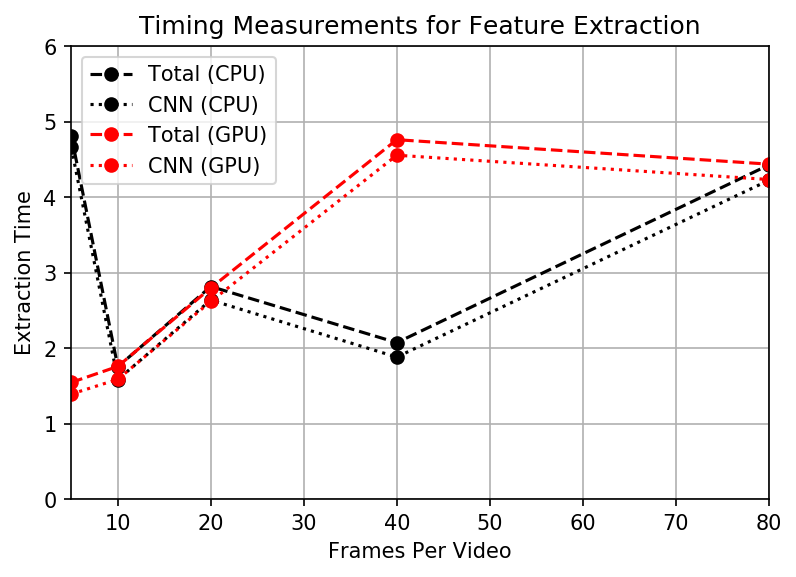

In [14]:
timing = np.load('CPU_timing.npy')
y_CNN = [y['CNN'] for y in timing]
y_total = [y['total'] for y in timing]

timing = np.load('GPU_timing.npy')
y_CNN_GPU = [y['CNN'] for y in timing]
y_total_GPU = [y['total'] for y in timing]

plt.figure(dpi=150)
plt.plot(x,y_total,'--ko')
plt.plot(x,y_CNN,':ko')
plt.plot(x,y_total_GPU,'--ro')
plt.plot(x,y_CNN_GPU,':ro')
plt.xlabel('Frames Per Video')
plt.ylabel('Extraction Time')
plt.xlim([5, 80])
plt.ylim([0,6])
plt.grid('on')
plt.legend([
    'Total (CPU)',
    'CNN (CPU)',
    'Total (GPU)',
    'CNN (GPU)'
])
plt.title('Timing Measurements for Feature Extraction')